In [82]:
import pandas as pd
pd.set_option('display.max_colwidth', -1) 
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import wordnet
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

<ipython-input-82-409f6501d757>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
df = pd.read_csv("tweets_noemoticon.csv", encoding = 'latin-1', header = None)

In [3]:
df[5].head(20)

0     @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D  
1     is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!      
2     @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds                            
3     my whole body feels itchy and like its on fire                                                                       
4     @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.       
5     @Kwesidei not the whole crew                                                                                         
6     Need a hug                                                                                                           
7     @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?                  
8     @T

In [4]:
df.iloc[15]

0    0                                                                                                      
1    1467812799                                                                                             
2    Mon Apr 06 22:20:20 PDT 2009                                                                           
3    NO_QUERY                                                                                               
4    HairByJess                                                                                             
5    @iamjazzyfizzle I wish I got to watch it with you!! I miss you and @iamlilnicki  how was the premiere?!
Name: 15, dtype: object

In [6]:
df[0] = df[0].apply(lambda x: 1 if x==4 else x)

In [23]:
# rename columns
df = df.rename(columns={5: 'text', 0: 'target', 2: 'timestamp', 4: 'username'})

In [8]:
import nltk

In [9]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aishabaitemirova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aishabaitemirova/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
df

,target,1,2,3,4,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best feeling ever
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me for details
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur


<AxesSubplot:xlabel='target', ylabel='count'>

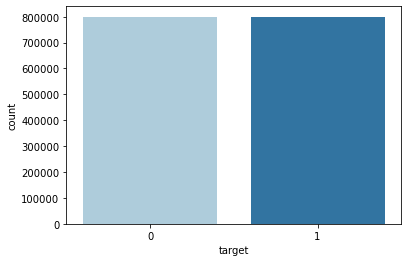

In [54]:
sns.set_palette("Paired")
sns.countplot(x= 'target',data=df)

In [11]:
# lowercase and remove punctuation
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace(r'[^\w\s]+', '')

In [12]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [13]:
w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

In [14]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in w_tokenizer.tokenize(text)]

In [15]:
# lemmatize text
df['text_lemmatized'] = df.text.apply(lemmatize_text)

In [16]:
df

,target,1,2,3,4,text,text_lemmatized
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]"
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]"
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]"
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]"
...,...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,just woke up having no school is the best feeling ever,"[just, woke, up, have, no, school, be, the, best, feel, ever]"
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,thewdbcom very cool to hear old walt interviews â httpblipfm8bmta,"[thewdbcom, very, cool, to, hear, old, walt, interview, â, httpblipfm8bmta]"
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,are you ready for your mojo makeover ask me for details,"[be, you, ready, for, your, mojo, makeover, ask, me, for, detail]"
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,happy 38th birthday to my boo of alll time tupac amaru shakur,"[happy, 38th, birthday, to, my, boo, of, alll, time, tupac, amaru, shakur]"


In [17]:
# drop irrelevant columns
df.drop(columns= 1, axis=1, inplace=True)
df.drop(columns= 3, axis=1, inplace=True)

In [21]:
df

,target,2,4,text,text_lemmatized
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]"
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]"
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]"
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]"
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]"
...,...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,just woke up having no school is the best feeling ever,"[just, woke, up, have, no, school, be, the, best, feel, ever]"
1599996,1,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,thewdbcom very cool to hear old walt interviews â httpblipfm8bmta,"[thewdbcom, very, cool, to, hear, old, walt, interview, â, httpblipfm8bmta]"
1599997,1,Tue Jun 16 08:40:49 PDT 2009,bpbabe,are you ready for your mojo makeover ask me for details,"[be, you, ready, for, your, mojo, makeover, ask, me, for, detail]"
1599998,1,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,happy 38th birthday to my boo of alll time tupac amaru shakur,"[happy, 38th, birthday, to, my, boo, of, alll, time, tupac, amaru, shakur]"


In [27]:
# remove hashtags and mentions
df['text'] = df['text'].apply(lambda t: re.sub('@[^ ]+|#[^ ]+', '', t))

In [28]:
df

,target,timestamp,username,text,text_lemmatized
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]"
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]"
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]"
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]"
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]"
...,...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,just woke up having no school is the best feeling ever,"[just, woke, up, have, no, school, be, the, best, feel, ever]"
1599996,1,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,thewdbcom very cool to hear old walt interviews â httpblipfm8bmta,"[thewdbcom, very, cool, to, hear, old, walt, interview, â, httpblipfm8bmta]"
1599997,1,Tue Jun 16 08:40:49 PDT 2009,bpbabe,are you ready for your mojo makeover ask me for details,"[be, you, ready, for, your, mojo, makeover, ask, me, for, detail]"
1599998,1,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,happy 38th birthday to my boo of alll time tupac amaru shakur,"[happy, 38th, birthday, to, my, boo, of, alll, time, tupac, amaru, shakur]"


In [44]:
# import stopwords from nltk
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
# append some additional stopwords to the nltk stopwords list
stopwords.append('shoulda')
stopwords.append('im')

In [49]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
# create a list of words that need to be removed from nltk stopwords because they might be relevant
# for classification purposes
non_stopwords = ['don', 'no','not'
 ,"don't",
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ain',
 'aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [51]:
# some stop words being removed from nltk stopwords list if those words are in non_stopwords list
new_stopwords = []

for word in stopwords:
    if word not in non_stopwords:
        new_stopwords.append(word)

In [52]:
new_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
# remove stopwords
df['text_nostopwords'] = df['text_lemmatized'].apply(lambda x: ' '.join([word for word in x if word not in (new_stopwords)]))

In [55]:
df

,target,timestamp,username,text,text_lemmatized,text_nostopwords
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]",switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day d
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]",upset cant update facebook texting might cry result school today also blah
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]",kenichan dive many time ball manage save 50 rest go bound
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]",whole body feel itchy like fire
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]",nationwideclass no not behaving mad cant see
...,...,...,...,...,...,...
1599995,1,Tue Jun 16 08:40:49 PDT 2009,AmandaMarie1028,just woke up having no school is the best feeling ever,"[just, woke, up, have, no, school, be, the, best, feel, ever]",woke no school best feel ever
1599996,1,Tue Jun 16 08:40:49 PDT 2009,TheWDBoards,thewdbcom very cool to hear old walt interviews â httpblipfm8bmta,"[thewdbcom, very, cool, to, hear, old, walt, interview, â, httpblipfm8bmta]",thewdbcom cool hear old walt interview â httpblipfm8bmta
1599997,1,Tue Jun 16 08:40:49 PDT 2009,bpbabe,are you ready for your mojo makeover ask me for details,"[be, you, ready, for, your, mojo, makeover, ask, me, for, detail]",ready mojo makeover ask detail
1599998,1,Tue Jun 16 08:40:49 PDT 2009,tinydiamondz,happy 38th birthday to my boo of alll time tupac amaru shakur,"[happy, 38th, birthday, to, my, boo, of, alll, time, tupac, amaru, shakur]",happy 38th birthday boo alll time tupac amaru shakur


In [72]:
# check if there are any duplicates in the dataset
duplicates = df.loc[df.duplicated(subset=['text_nostopwords'])]

In [73]:
duplicates.head(40)

,target,timestamp,username,text,text_lemmatized,text_nostopwords
54,0,Mon Apr 06 22:22:32 PDT 2009,CiaraRenee,i need a hug,"[i, need, a, hug]",need hug
249,0,Mon Apr 06 22:36:27 PDT 2009,Artiel87,mandayyy,[mandayyy],mandayyy
253,0,Mon Apr 06 22:36:51 PDT 2009,gregcronin,missed brent at praise band no fun to not have your lead guitarist ltpoutgt,"[miss, brent, at, praise, band, no, fun, to, not, have, your, lead, guitarist, ltpoutgt]",miss brent praise band no fun not lead guitarist ltpoutgt
870,0,Mon Apr 06 23:21:02 PDT 2009,flashbrother,work again,"[work, again]",work
891,0,Mon Apr 06 23:21:44 PDT 2009,tygerbaby,stephenkruiser im so sorry to hear about your dog,"[stephenkruiser, im, so, sorry, to, hear, about, your, dog]",stephenkruiser sorry hear dog
1338,0,Mon Apr 06 23:53:34 PDT 2009,kimmiecubaby,is cold,"[be, cold]",cold
1537,0,Tue Apr 07 00:07:09 PDT 2009,supclayyy,really now time for sleep dreaming of my city more tattoos and other great things waking up to early morning sociology,"[really, now, time, for, sleep, dream, of, my, city, more, tattoo, and, other, great, thing, wake, up, to, early, morning, sociology]",really now time sleep dream city tattoo great thing wake early morning sociology
1561,0,Tue Apr 07 00:10:52 PDT 2009,xtinasteimel23,i cant sleep,"[i, cant, sleep]",cant sleep
1567,0,Tue Apr 07 00:11:34 PDT 2009,vescerebracis,still doing homework,"[still, do, homework]",still homework
1669,0,Tue Apr 07 00:17:48 PDT 2009,88claytions,doing homework,"[do, homework]",homework


In [74]:
duplicates.shape

(48195, 6)

In [75]:
df.shape

(1600000, 6)

In [70]:
work = df.loc[df['text_nostopwords']== 'work']

In [71]:
work.shape

(649, 6)

In [76]:
need_hug = df.loc[df['text_nostopwords'] == 'need hug']

In [77]:
need_hug.shape

(56, 6)

In [79]:
# drop any duplicates
df.drop_duplicates(subset='text_nostopwords', inplace=True)

In [80]:
df.shape

(1551805, 6)

In [84]:
stemmer = SnowballStemmer('english')

In [87]:
df['text_stemmed'] = df['text_nostopwords'].apply(lambda x: stemmer.stem(x))

In [90]:
df.shape

(1551805, 7)

In [97]:
df.head(40)

,target,timestamp,username,text,text_lemmatized,text_nostopwords,text_stemmed
0,0,Mon Apr 06 22:19:45 PDT 2009,_TheSpecialOne_,switchfoot httptwitpiccom2y1zl awww thats a bummer you shoulda got david carr of third day to do it d,"[switchfoot, httptwitpiccom2y1zl, awww, thats, a, bummer, you, shoulda, get, david, carr, of, third, day, to, do, it, d]",switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day d,switchfoot httptwitpiccom2y1zl awww thats bummer get david carr third day d
1,0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he cant update his facebook by texting it and might cry as a result school today also blah,"[be, upset, that, he, cant, update, his, facebook, by, texting, it, and, might, cry, a, a, result, school, today, also, blah]",upset cant update facebook texting might cry result school today also blah,upset cant update facebook texting might cry result school today also blah
2,0,Mon Apr 06 22:19:53 PDT 2009,mattycus,kenichan i dived many times for the ball managed to save 50 the rest go out of bounds,"[kenichan, i, dive, many, time, for, the, ball, manage, to, save, 50, the, rest, go, out, of, bound]",kenichan dive many time ball manage save 50 rest go bound,kenichan dive many time ball manage save 50 rest go bound
3,0,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, on, fire]",whole body feel itchy like fire,whole body feel itchy like fir
4,0,Mon Apr 06 22:19:57 PDT 2009,Karoli,nationwideclass no its not behaving at all im mad why am i here because i cant see you all over there,"[nationwideclass, no, it, not, behaving, at, all, im, mad, why, be, i, here, because, i, cant, see, you, all, over, there]",nationwideclass no not behaving mad cant see,nationwideclass no not behaving mad cant se
5,0,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,kwesidei not the whole crew,"[kwesidei, not, the, whole, crew]",kwesidei not whole crew,kwesidei not whole crew
6,0,Mon Apr 06 22:20:03 PDT 2009,mybirch,need a hug,"[need, a, hug]",need hug,need hug
7,0,Mon Apr 06 22:20:03 PDT 2009,coZZ,loltrish hey long time no see yes rains a bit only a bit lol im fine thanks hows you,"[loltrish, hey, long, time, no, see, yes, rain, a, bit, only, a, bit, lol, im, fine, thanks, hows, you]",loltrish hey long time no see yes rain bit bit lol fine thanks hows,loltrish hey long time no see yes rain bit bit lol fine thanks how
8,0,Mon Apr 06 22:20:05 PDT 2009,2Hood4Hollywood,tatiana_k nope they didnt have it,"[tatiana_k, nope, they, didnt, have, it]",tatiana_k nope didnt,tatiana_k nope didnt
9,0,Mon Apr 06 22:20:09 PDT 2009,mimismo,twittera que me muera,"[twittera, que, me, muera]",twittera que muera,twittera que muera
